In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/RBC_news_shock_model.csv")
raw_data.head()

,y,c,k,l,z,r,w,invest,AUX_EXO_LAG_8_0,AUX_EXO_LAG_8_1,AUX_EXO_LAG_8_2,AUX_EXO_LAG_8_3,AUX_EXO_LAG_8_4,AUX_EXO_LAG_8_5,AUX_EXO_LAG_8_6,AUX_EXO_LAG_8_7
0,1.404263,-0.210354,2.513897,-0.219617,0.763838,0.299475,1.223402,3.998772,-1.224837,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.220280,-0.045473,2.704218,0.216645,1.245542,0.386886,1.603157,6.768198,-0.419023,-1.224837,9.561515e-18,8.672823e-17,2.874062e-17,-8.858712e-18,4.540049e-17,1.042005e-16
2,2.865914,0.423622,2.918022,0.334926,1.749122,0.444675,2.130510,7.943448,0.577426,-0.419023,-1.224837e+00,6.892278e-17,1.139303e-16,3.167084e-17,7.050521e-17,1.710968e-16
3,2.912103,0.312543,3.139079,0.440295,1.654157,0.423401,2.071330,8.461441,-0.602121,0.577426,-4.190232e-01,-1.224837e+00,8.342478e-17,1.217699e-16,4.065108e-17,1.427634e-16
4,2.766537,0.396454,3.334981,0.286546,1.538655,0.376868,2.079513,7.627445,0.183884,-0.602121,5.774259e-01,-4.190232e-01,-1.224837e+00,9.906881e-17,1.748628e-16,1.606307e-16


In [3]:
print(raw_data.columns.to_list())

['y', 'c', 'k', 'l', 'z', 'r', 'w', 'invest', 'AUX_EXO_LAG_8_0', 'AUX_EXO_LAG_8_1', 'AUX_EXO_LAG_8_2', 'AUX_EXO_LAG_8_3', 'AUX_EXO_LAG_8_4', 'AUX_EXO_LAG_8_5', 'AUX_EXO_LAG_8_6', 'AUX_EXO_LAG_8_7']


In [4]:
column_mapping = {
    'y': 'Output',
    'c': 'Consumption',
    'k': 'Capital',
    'l': 'Hours Worked',
    'z': 'Total Factor Productivity',
    'ghat': 'Government Spending',
    'r': 'Annualized Interest Rate',
    'w': 'Real Wage',
    'invest': 'Investment'
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Consumption')
print(idx)

     Output  Consumption   Capital  Hours Worked  Total Factor Productivity  \
0  1.404263    -0.210354  2.513897     -0.219617                   0.763838   
1  2.220280    -0.045473  2.704218      0.216645                   1.245542   
2  2.865914     0.423622  2.918022      0.334926                   1.749122   
3  2.912103     0.312543  3.139079      0.440295                   1.654157   
4  2.766537     0.396454  3.334981      0.286546                   1.538655   

   Annualized Interest Rate  Real Wage  Investment  AUX_EXO_LAG_8_0  \
0                  0.299475   1.223402    3.998772        -1.224837   
1                  0.386886   1.603157    6.768198        -0.419023   
2                  0.444675   2.130510    7.943448         0.577426   
3                  0.423401   2.071330    8.461441        -0.602121   
4                  0.376868   2.079513    7.627445         0.183884   

   AUX_EXO_LAG_8_1  AUX_EXO_LAG_8_2  AUX_EXO_LAG_8_3  AUX_EXO_LAG_8_4  \
0         0.000000     0.

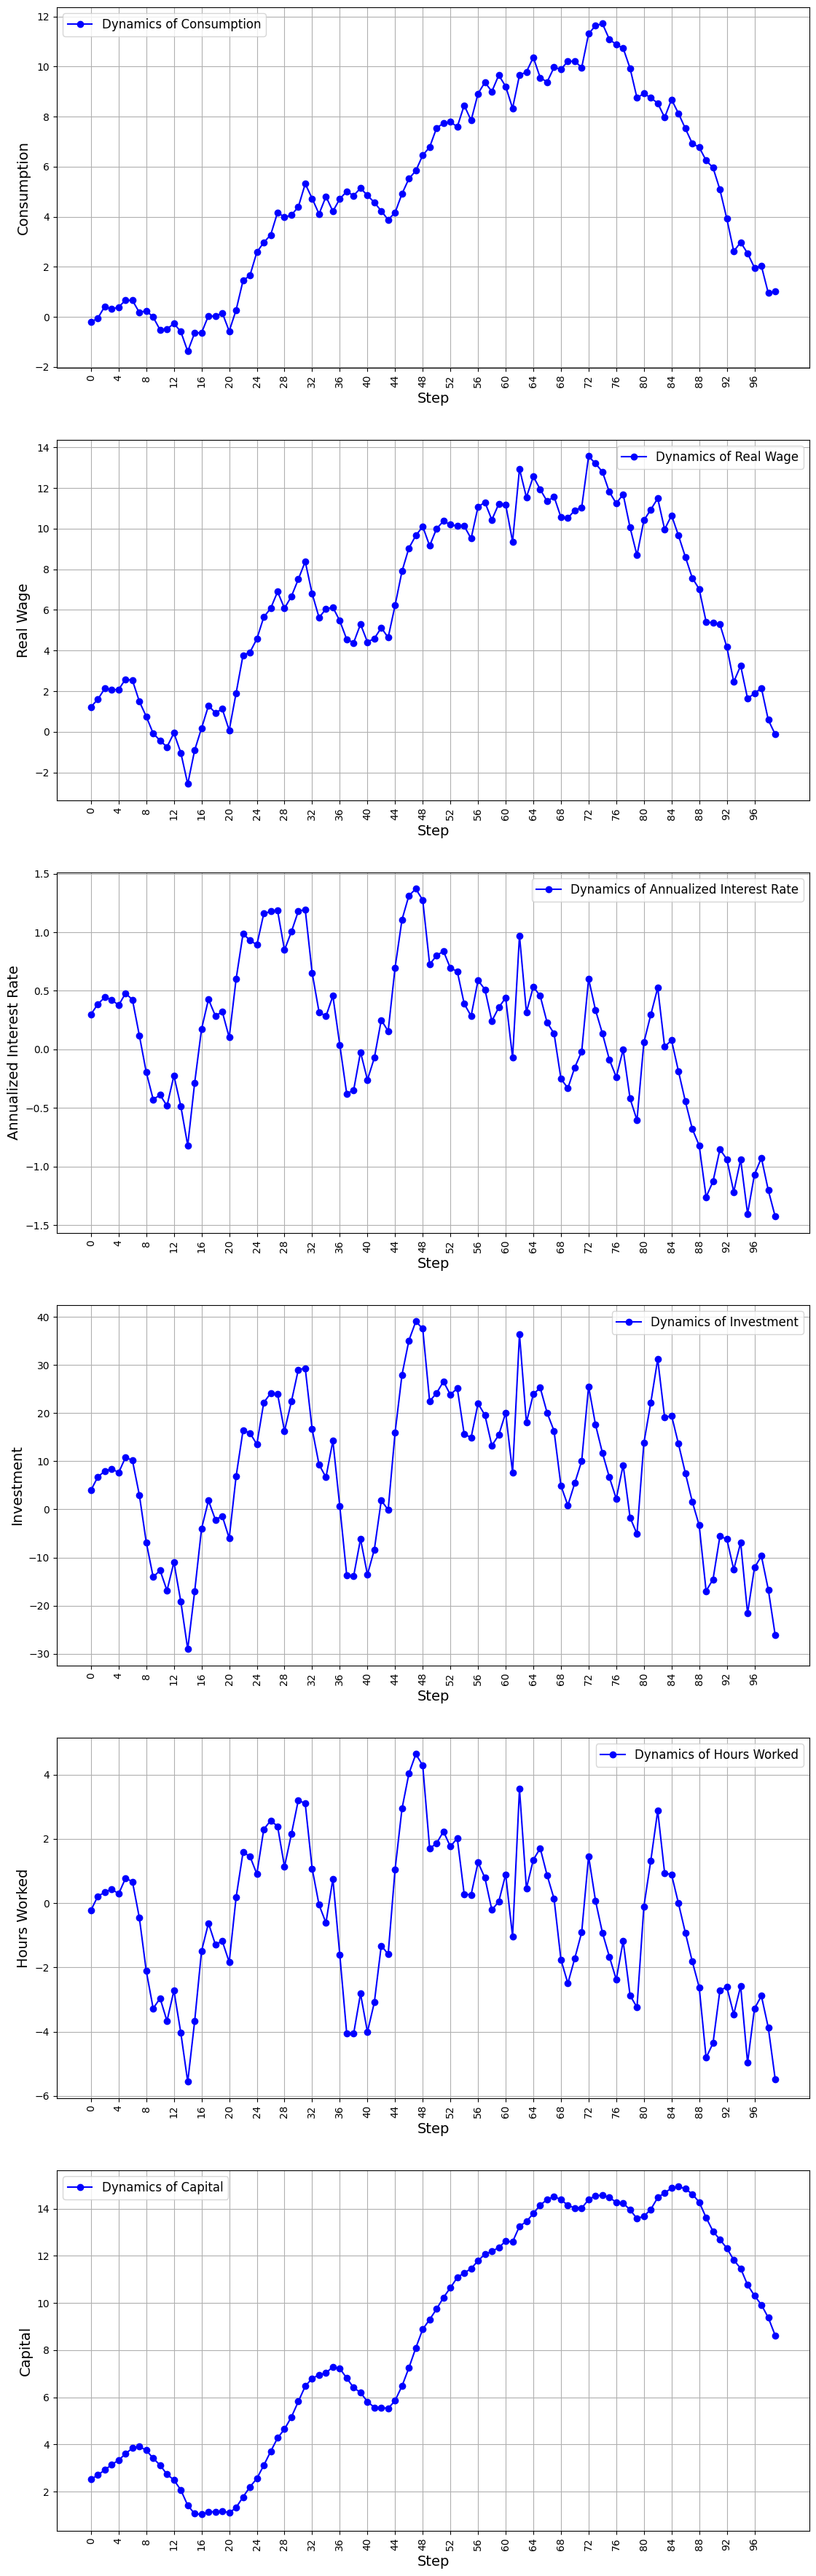

In [6]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Real Wage", "Annualized Interest Rate", "Investment", "Hours Worked", "Capital"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)
